# Data Emisi CO2 di Indonesia

## Project Preparation (Tolong tambahin)
* Background: [Sumber halaman utama]()
Dari tahun ke tahun tingkat emisi CO2 di Indonesia kian meningkat. Untuk itu, diperlukan suatu penyelesaian agar tingkat emisi dapat menurun. Akan dikaji seberapa besar pengaruh penggunaan transportasi umum dengan tingkat emisi CO2 di Indonesia. Untuk mendapatkan insight terkait masalah yang ingin diselesaikan, berikut ini akan diolah dataset yang mencakup informasi terkait perubahan iklim, polusi udara, penggunaan transportasi umum, dan faktor-faktor terkait lainnya.
* Data: [Data dan sumber](https://www.bps.go.id/indicator/17/57/2/perkembangan-jumlah-kendaraan-bermotor-menurut-jenis.html)
* `Google Looker`: [Insight](https://lookerstudio.google.com/reporting/ce2fcb48-8ef2-49e9-9d76-2553645b92e3/page/ZgmiD)

## Background Final Project (Optional)

## Problem Statement

## Data Prepration

In [ ]:
# Import module
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns', None)
%matplotlib inline

In [ ]:
# file name annual-co2-emissions-per-country.csv
data1 = pd.read_csv('https://raw.githubusercontent.com/idrqnkaf/Zenius-Data-Analytics-Assignments/main/Final%20Project/annual-co2-emissions-per-country.csv?token=GHSAT0AAAAAACKT424LKVB3PR2722XXO4VQZLP5YJA')
df1 = pd.DataFrame(data1)

# filter for indonesia country only
df1_idn = df1[df1['Entity'] == 'Indonesia']

# Mengganti nama kolom yang panjang menjadi pendek
df1_idn.rename(columns={'Annual CO₂ emissions': 'Emisi CO2'}, inplace=True)
df1_idn

<ipython-input-37-c5a29ab4a389>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_idn.rename(columns={'Annual CO₂ emissions': 'Emisi CO2'}, inplace=True)


,Entity,Code,Year,Emisi CO2
13890,Indonesia,IDN,1889,3664.0
13891,Indonesia,IDN,1890,14656.0
13892,Indonesia,IDN,1891,21984.0
13893,Indonesia,IDN,1892,190757.0
13894,Indonesia,IDN,1893,403040.0
...,...,...,...,...
14018,Indonesia,IDN,2017,567254800.0
14019,Indonesia,IDN,2018,603657100.0
14020,Indonesia,IDN,2019,659435700.0
14021,Indonesia,IDN,2020,609786100.0


In [ ]:
df1_idn.isnull().sum()

Entity       0
Code         0
Year         0
Emisi CO2    0
dtype: int64

In [ ]:
# df1_idn.to_csv('CO2-emission-IDN.csv', index=False)

## EMISI CO2 di Indonesia

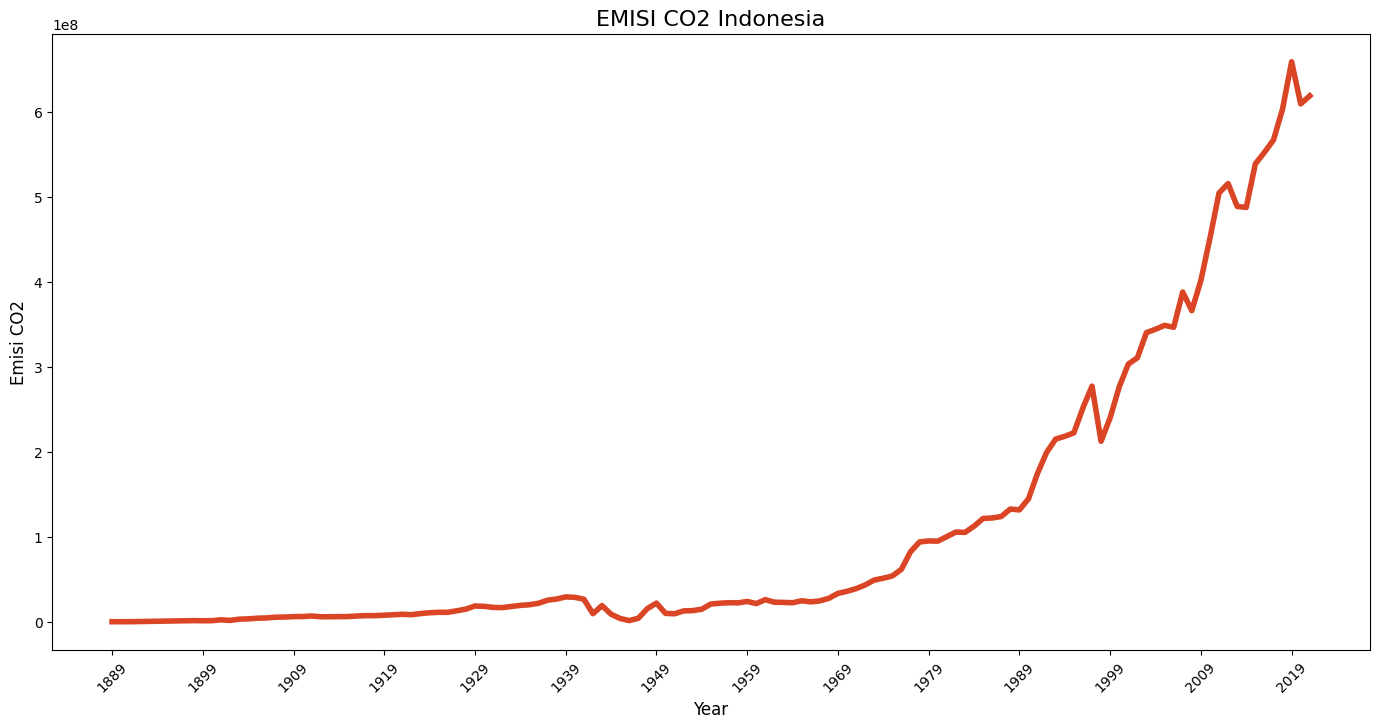

In [ ]:
# Insight sementara emisi CO2 di Indonesia
plt.figure(figsize=(17, 8))
sns.lineplot(x='Year', y='Emisi CO2', data=df1_idn, color= '#DA4525', lw= 4)
plt.title('EMISI CO2 Indonesia', fontsize= 16)
plt.xlabel('Year', fontsize= 12)
plt.ylabel('Emisi CO2', fontsize= 12)
plt.xticks(rotation=90)

# Mengatur label sumbu x (Year) untuk menampilkan setiap 10 tahun
plt.xticks(df1_idn['Year'][::10], rotation=45)
plt.show()

Berdasarkan data, tampaknya emisi CO2 di Indonesia telah meningkat secara signifikan sejak tahun 1889 hingga 2021. Pada tahun 1889, emisi CO2 adalah 3664.0, dan pada tahun 2021, angka tersebut telah meningkat menjadi 619277500.0.

Namun, perlu diperhatikan bahwa ada fluktuasi dalam data. Misalnya, pada tahun 2019, emisi mencapai 659435700.0, tetapi turun menjadi 609786100.0 pada tahun 2020 sebelum naik lagi pada tahun 2021.

Trend umumnya adalah peningkatan, tetapi fluktuasi ini mungkin menunjukkan bahwa ada faktor-faktor tertentu yang mempengaruhi emisi CO2 dari tahun ke tahun. Ini bisa mencakup perubahan dalam kebijakan lingkungan, perubahan dalam penggunaan energi, atau perubahan dalam aktivitas ekonomi.

## Simple Linear Regression Year and Emisi CO2

In [ ]:
from sklearn.linear_model import LinearRegression #Machine learning forcasting

Koefisien (Slope): 17769710.26
Intercept: -35270174516.753


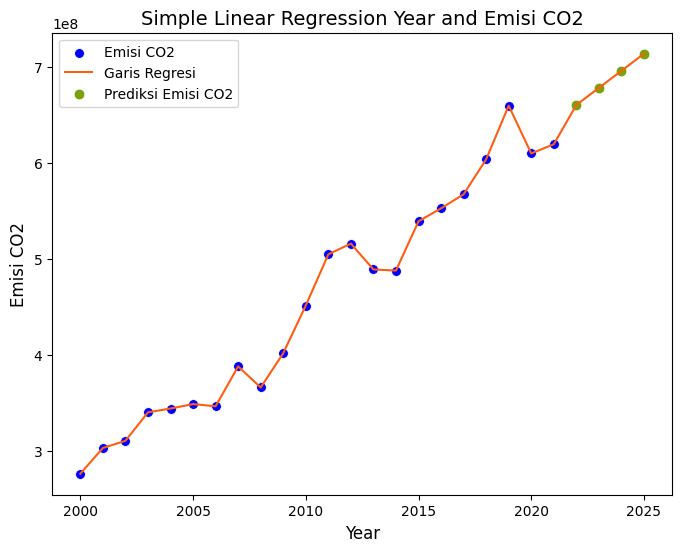

In [ ]:
# Filter untuk menyiapkan data untuk di forcast
df1_idn20 = df1_idn[df1_idn['Year'] >= 2000]

# Memisahkan variabel independen (X) dan variabel dependen (y)
X = df1_idn20['Year'].values.reshape(-1, 1)  # Year sebagai variabel independen (harus dalam bentuk matriks 2D)
y = df1_idn20['Emisi CO2'].values  # CO2 Levels sebagai variabel dependen

# Inisialisasi model regresi linear
model = LinearRegression()

# Melatih model menggunakan data
model.fit(X, y)

# Membuat prediksi untuk tahun-tahun tertentu
tahun_prediksi = [2022, 2023, 2024, 2025]

# mengonversi tahun_prediksi menjadi array NumPy dan menggunakan .reshape(-1, 1)
prediksi_co2 = model.predict(np.array(tahun_prediksi).reshape(-1, 1))

# Menghitung b0 dan b1
b0 = round(float(model.intercept_),3)
b1 = round(float(model.coef_[0]),3)

# Menampilkan koefisien dan intercept
print("Koefisien (Slope):", b1)
print("Intercept:", b0)

# Membuat DataFrame untuk prediksi
df_prediksi = pd.DataFrame({'Year': tahun_prediksi, 'Emisi CO2': prediksi_co2})

# menggabungkan DataFrame data asli (df) dan DataFrame hasil prediksi (df_prediksi) menggunakan fungsi pd.concat()
df_plot = pd.concat([df1_idn20, df_prediksi])

# Membuat plot menggunakan Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Year', y='Emisi CO2', data=df1_idn20, color='blue', label='Emisi CO2', s= 50)
sns.lineplot(x='Year', y='Emisi CO2', data=df_plot, color='#FF5D11', label='Garis Regresi')
sns.scatterplot(x='Year', y='Emisi CO2', data=df_prediksi, color='#79A20A', label='Prediksi Emisi CO2', s= 60)
plt.xlabel('Year', fontsize= 12)
plt.ylabel('Emisi CO2', fontsize= 12)
plt.legend()
plt.title('Simple Linear Regression Year and Emisi CO2', fontsize= 14)
plt.show()

In [ ]:
df_plot.describe()

,Year,Emisi CO2
count,26.000000,2.600000e+01
mean,2012.500000,4.913674e+08
std,7.648529,1.376626e+08
min,2000.000000,2.765631e+08
25%,2006.250000,3.533148e+08
50%,2012.500000,4.969276e+08
75%,2018.750000,6.082538e+08
max,2025.000000,7.134888e+08


# Perkembangan Jumlah Kendaraan di Indonesia

In [ ]:
# file name annual-co2-emissions-per-country.csv
data2 = pd.read_csv('https://raw.githubusercontent.com/idrqnkaf/Zenius-Data-Analytics-Assignments/main/Final%20Project/Perkembangan%20Penggunaan%20kendaraan.csv')
df2 = pd.DataFrame(data2)
df2

,Tahun,Entity,Jumlah penggunaan kendaraan,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,2016,Mobil Penumpang,13142958,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016,Mobil Bis,204512,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,Mobil Barang,4326731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016,Sepeda motor,94531510,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017,Mobil Penumpang,13968202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2017,Mobil Bis,213359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2017,Mobil Barang,4540902,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2017,Sepeda motor,100200245,NaN,NaN,NaN,NaN,NaN,NaN,
8,2018,Mobil Penumpang,14830698,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2018,Mobil Bis,222872,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Menghapus kolom yang tidak memiliki nama
df2 = df2.filter(regex='^(?!Unnamed)')
df2

,Tahun,Entity,Jumlah penggunaan kendaraan
0,2016,Mobil Penumpang,13142958
1,2016,Mobil Bis,204512
2,2016,Mobil Barang,4326731
3,2016,Sepeda motor,94531510
4,2017,Mobil Penumpang,13968202
5,2017,Mobil Bis,213359
6,2017,Mobil Barang,4540902
7,2017,Sepeda motor,100200245
8,2018,Mobil Penumpang,14830698
9,2018,Mobil Bis,222872


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Tahun                        40 non-null     int64 
 1   Entity                       40 non-null     object
 2   Jumlah penggunaan kendaraan  40 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ KB


In [ ]:
df2.describe()

,Tahun,Jumlah penggunaan kendaraan
count,40.000000,4.000000e+01
mean,2020.500000,7.232559e+08
std,2.908872,1.645965e+09
min,2016.000000,2.045120e+05
25%,2018.000000,5.068026e+06
50%,2020.500000,1.748731e+07
75%,2023.000000,1.268566e+08
max,2025.000000,6.000030e+09


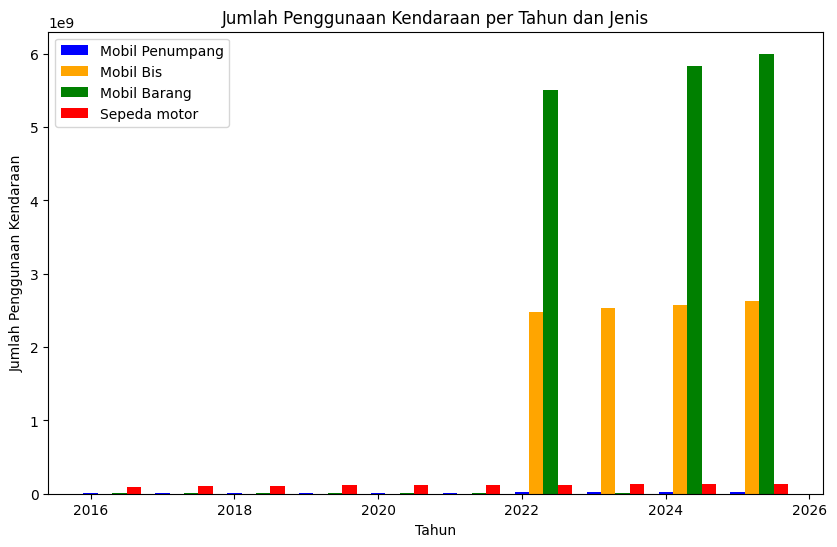

In [ ]:
df = df2

# Membuat bar plot
plt.figure(figsize=(10, 6))
colors = ['blue', 'orange', 'green', 'red']
for i, entity in enumerate(df['Entity'].unique()):
    entity_data = df[df['Entity'] == entity]
    plt.bar(entity_data['Tahun'] + i * 0.2, entity_data['Jumlah penggunaan kendaraan'],
            width=0.2, label=entity, color=colors[i])

plt.xlabel('Tahun')
plt.ylabel('Jumlah Penggunaan Kendaraan')
plt.title('Jumlah Penggunaan Kendaraan per Tahun dan Jenis')
plt.legend()
plt.show()
